In [3]:
from google.colab import drive
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Prostate Cancer (2).txt')
data=df
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1zPQsZ144O0vn9QAHt6AVXTCyrP9uvd0n1ayOeV4troQ#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     21.68
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           7.65e-18
Time:                        15:56:44   Log-Likelihood:                -98.248
No. Observations:                  97   AIC:                             214.5
Df Residuals:                      88   BIC:                             237.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1816      1.321      0.137      0.8

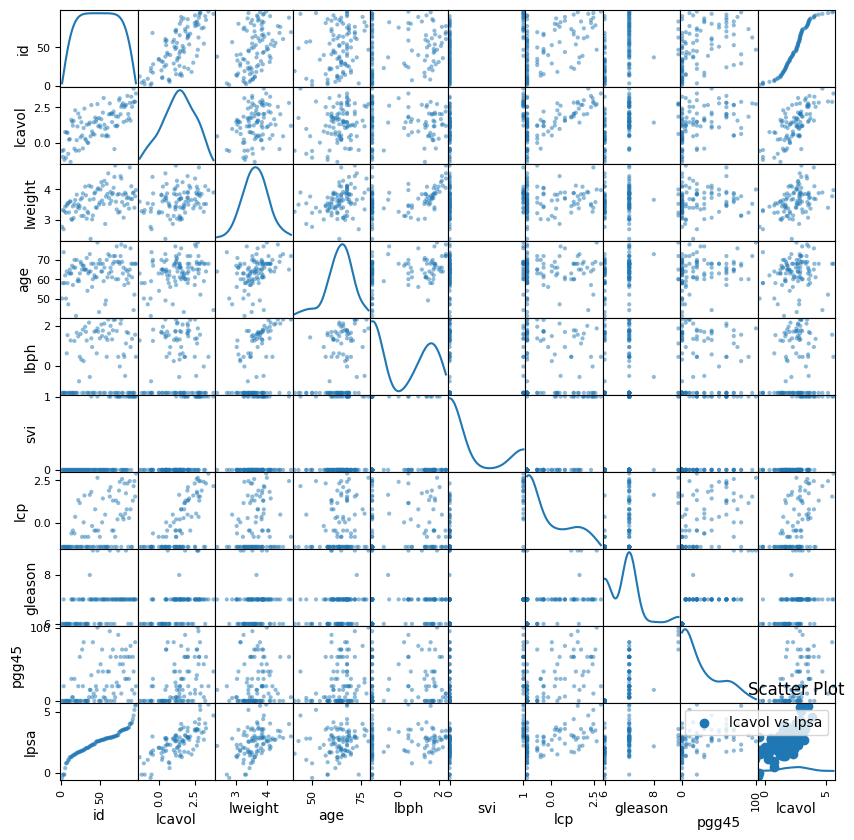

[[ 0.42719338  1.21862219]
 [ 0.39842393  1.12408602]
 [-0.08839695  0.97162323]
 [ 0.23164067  1.00833469]
 [ 1.47163266  1.99145897]
 [ 0.44083654  1.24596485]
 [ 1.66251528  2.13781997]
 [ 1.82771195  2.43829214]
 [ 0.81512699  1.69412688]
 [ 1.01666583  1.57401072]
 [ 1.19839546  1.79018952]
 [ 0.47113459  1.30102908]
 [ 1.73236045  2.35039896]
 [ 1.44503611  2.22752125]
 [ 1.75861318  2.38237351]
 [ 1.48247597  2.2400613 ]
 [ 0.95201679  1.66552808]
 [ 2.06152399  2.86354057]
 [ 0.84533878  1.82271054]
 [ 1.47320994  2.08538059]
 [ 1.73622955  2.28511163]
 [ 2.27470168  3.08511962]
 [ 0.79283596  1.37822362]
 [ 2.14924792  2.90034817]
 [ 1.51844877  2.10378554]
 [ 1.59437476  2.3420071 ]
 [ 1.52226175  2.4992677 ]
 [ 1.33222216  2.05393608]
 [ 1.50376978  2.51398221]
 [ 1.71495564  2.78446954]
 [ 1.74887813  2.40196382]
 [ 1.59507878  2.15894528]
 [ 1.39459765  2.29918034]
 [ 1.09337315  1.66790794]
 [ 0.77033724  1.39804422]
 [ 2.47381778  3.21927786]
 [ 1.2873335   2.58691403]
 

In [10]:
X = data[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = data['lpsa']
# افزودن یک ستون ثابت برای رگرسیون
X = sm.add_constant(X)
# رگرسیون خطی
model = sm.OLS(y, X).fit()
print(model.summary())

# نمودار اسکترپلات
scatter_matrix(df, figsize=(10, 10), diagonal='kde')
plt.scatter(data['lcavol'], y, label='lcavol vs lpsa')
plt.xlabel('lcavol')
plt.ylabel('lpsa')
plt.title('Scatter Plot')
plt.legend()
plt.show()

# فاصله اطمینان
predictions = model.get_prediction(X)
pred_int = predictions.conf_int()
print(pred_int)

from pandas.plotting import scatter_matrix



# بررسی مقادیر غیر عددی
for column in df.columns:
    print(f"مقادیر غیر عددی در {column}:")
    print(df[~df[column].apply(lambda x: isinstance(x, (int, float)))])

# تبدیل مقادیر غیر عددی به NaN
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# حذف مقادیر گمشده
df = df.dropna()

# محاسبه ماتریس همبستگی
correlation_matrix = df.corr()

# نمایش ماتریس همبستگی
print("ماتریس همبستگی:")
print(correlation_matrix)




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Forwardانتخاب مرحله‌ای
def forward_selection(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    while initial_features:
        best_pval = 1
        for feature in initial_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [feature]])).fit()
            pval = model.pvalues[feature]
            if pval < best_pval:
                best_pval = pval
                best_feature = feature
        if best_pval < 0.05:  # p-valueآستانه
            best_features.append(best_feature)
            initial_features.remove(best_feature)
        else:
            break
    return best_features

selected_features = forward_selection(X_train, y_train)
print("Selected features (Forward):", selected_features)

# مدل نهایی
final_model = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()
print(final_model.summary())

#  backwardانتخاب مرحله‌ای
def backward_selection(X, y):
    features = X.columns.tolist()
    while features:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        pvalues = model.pvalues.iloc[1:]
        max_pval = pvalues.max()
        if max_pval > 0.05:  # p-valueآستانه
            excluded_feature = pvalues.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

selected_features_backward = backward_selection(X_train, y_train)
print("Selected features (Backward):", selected_features_backward)

# مدل نهایی
final_model_backward = sm.OLS(y_train, sm.add_constant(X_train[selected_features_backward])).fit()
print(final_model_backward.summary())


# stepwiseانتخاب مرحله‌ای
def stepwise_selection(X, y):
    features = []
    initial_features = X.columns.tolist()
    while True:
        # Forwardمرحله
        best_pval = 1
        for feature in initial_features:
            model = sm.OLS(y, sm.add_constant(X[features + [feature]])).fit()
            pval = model.pvalues[feature]
            if pval < best_pval:
                best_pval = pval
                best_feature = feature

        if best_pval < 0.05:  # p-valueآستانه
            features.append(best_feature)
            initial_features.remove(best_feature)
        else:
            break

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
واریانس نمونه‌های بوت استرپ: 0.013562638358260866
خطای استاندارد نمونه‌های بوت استرپ: 0.11645874101269027
فاصله اطمینان 95%: [2.240094727680412, 2.7064533754381443]


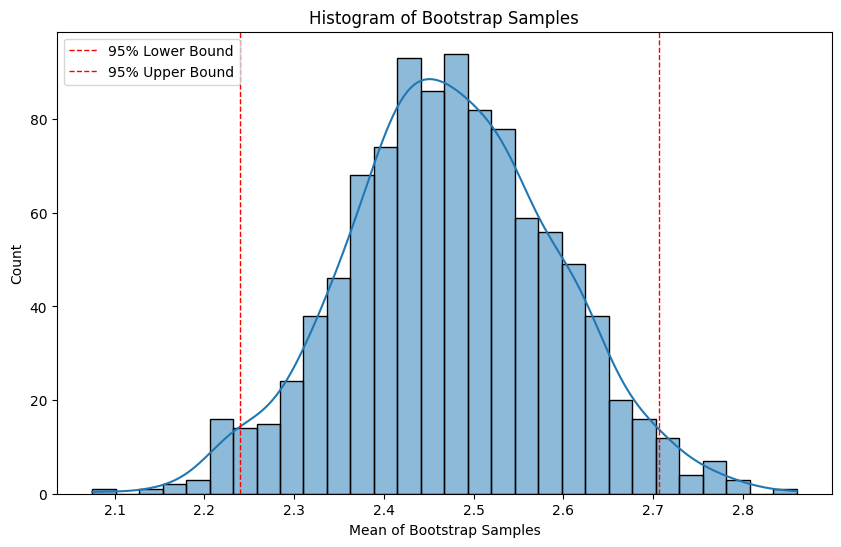

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# بارگذاری داده‌ها
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Prostate Cancer (2).txt')
data=df
df.head()
from io import StringIO

# lpsaمتغیر
lpsa = df['lpsa'].values

# پارامترهای بوت استرپینگ
n_iterations = 1000  # تعداد تکرار
n_size = len(lpsa)   # اندازه نمونه

# لیست برای ذخیره نمونه‌های بوت استرپ
bootstrap_samples = []

# ایجاد نمونه‌های بوت استرپ
for _ in range(n_iterations):
    sample = np.random.choice(lpsa, size=n_size, replace=True)
    bootstrap_samples.append(np.mean(sample))

# محاسبه واریانس و خطای استاندارد
bootstrap_variance = np.var(bootstrap_samples)
bootstrap_std_error = np.std(bootstrap_samples)

# محاسبه فاصله اطمینان %95
lower_bound = np.percentile(bootstrap_samples, 2.5)
upper_bound = np.percentile(bootstrap_samples, 97.5)

# نتایج
print(f'واریانس نمونه‌های بوت استرپ: {bootstrap_variance}')
print(f'خطای استاندارد نمونه‌های بوت استرپ: {bootstrap_std_error}')
print(f'فاصله اطمینان 95%: [{lower_bound}, {upper_bound}]')

# رسم هیستوگرام نمونه‌های بوت استرپ(
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_samples, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=('95% Lower Bound'))
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1, label=('95% Upper Bound'))
plt.title('Histogram of Bootstrap Samples')
plt.xlabel('Mean of Bootstrap Samples')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
